In [3]:
import pandas as pd 
import sklearn 
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
dt_heart = pd.read_csv("heart.csv")
print(dt_heart)

      age  sex  cp  trestbps  chol  ...  oldpeak  slope  ca  thal  target
0      52    1   0       125   212  ...      1.0      2   2     3       0
1      53    1   0       140   203  ...      3.1      0   0     3       0
2      70    1   0       145   174  ...      2.6      0   0     3       0
3      61    1   0       148   203  ...      0.0      2   1     3       0
4      62    0   0       138   294  ...      1.9      1   3     2       0
...   ...  ...  ..       ...   ...  ...      ...    ...  ..   ...     ...
1020   59    1   1       140   221  ...      0.0      2   0     2       1
1021   60    1   0       125   258  ...      2.8      1   1     3       0
1022   47    1   0       110   275  ...      1.0      1   1     2       0
1023   50    0   0       110   254  ...      0.0      2   0     2       1
1024   54    1   0       120   188  ...      1.4      1   1     3       0

[1025 rows x 14 columns]


In [5]:
dt_features = dt_heart.drop(["target"], axis=1)
dt_target = dt_heart["target"]

In [6]:
dt_features = StandardScaler().fit_transform(dt_features)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(dt_features, dt_target, test_size = 0.30, random_state = 1)

In [8]:
pca = PCA(n_components=3)
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

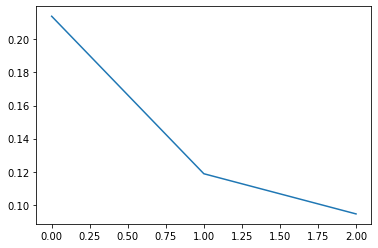

In [9]:
ipca = IncrementalPCA(n_components=3, batch_size=10)
ipca.fit(x_train)
plt.plot(range(len(pca.explained_variance_)), pca.explained_variance_ratio_)
plt.show()

In [10]:
#Calculamos el score del PCA
logistic = LogisticRegression(solver="lbfgs")
dt_train = pca.transform(x_train)
dt_test = pca.transform(x_test)
logistic.fit(dt_train, y_train)
print("Score PCA: ", logistic.score(dt_test, y_test))

Score PCA:  0.814935064935065


In [11]:
#Calculamos el score con Incremental PCA
dt_train = ipca.transform(x_train)
dt_test = ipca.transform(x_test)
logistic.fit(dt_train, y_train)
print("Score IPCA: ", logistic.score(dt_test, y_test))

Score IPCA:  0.7922077922077922
